In [1]:
import yt
import numpy as np
import trident as tri

In [2]:
filename = "~/Repo/yt/doc/source/quickstart/IsolatedGalaxy/galaxy0030/galaxy0030"

In [3]:
ds = yt.load(filename)

ray_start= np.array([0.4, 0, 0.45], dtype=float)
ray_end = np.array([0.4, 1, 0.45], dtype=float)

ray = ray_end - ray_start
line_list = ['O VI', 'H I', 'C IV']
norm_vec = [ray[1], -1*ray[0], 0]

yt : [INFO     ] 2019-04-02 22:32:43,629 Parameters: current_time              = 0.00600002000283
yt : [INFO     ] 2019-04-02 22:32:43,630 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-04-02 22:32:43,632 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-04-02 22:32:43,633 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-04-02 22:32:43,635 Parameters: cosmological_simulation   = 0.0


## coding up ray

In [4]:
ray_start =ds.arr(ray_start, "code_length")
ray_end = ds.arr(ray_end, "code_length")
tri_ray = tri.make_simple_ray(ds,
                              start_position = ray_start,
                              end_position = ray_end,
                              lines = line_list,
			      ftype = 'gas')


Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 6082.52it/s]
yt : [INFO     ] 2019-04-02 22:32:45,064 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2019-04-02 22:32:46,546 Getting segment at z = 0.0: [0.4  0.   0.45] unitary to [0.4  1.   0.45] unitary.
/home/bb/.local/lib/python2.7/site-packages/yt/units/yt_array.py:1394: RuntimeWarning: invalid value encountered in divide
  out=out, **kwargs)
yt : [INFO     ] 2019-04-02 22:32:46,552 Getting subsegment: [0.4 unitary, 0.0 unitary, 0.45 unitary] to [0.4 unitary, 1.0 unitary, 0.45 unitary].
yt : [INFO     ] 2019-04-02 22:32:46,721 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2019-04-02 22:32:46,961 Parameters: current_time              = 0.0060000200028298 code_time
yt : [INFO     ] 2019-04-02 22:32:46,963 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-04-02 22:32:46,965 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2019-04-02 22:32:46,96

In [5]:
spx = yt.SlicePlot(ds, 'x', 
                   'density', 
                   center = [0.5, 0.5, 0.5],
                   width= (1))
spx.annotate_ray(tri_ray)
spx.save("xSlice.png")

yt : [INFO     ] 2019-04-02 22:32:47,070 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-04-02 22:32:47,073 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-04-02 22:32:47,076 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-04-02 22:32:47,078 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-04-02 22:32:47,081 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2019-04-02 22:32:47,947 Saving plot xSlice.png


['xSlice.png']

In [6]:
#want norm vector that would give same result as x-axis slice
center = (ray_end + ray_start)/2
center[2]=0.5
sp_me= yt.SlicePlot(ds, norm_vec, 'density', 
                    center = center, 
                    north_vector=[0,0,1],
                    width= (1))
sp_me.annotate_ray(tri_ray)
sp_me.save("slice.png")

yt : [WARNING  ] 2019-04-02 22:32:48,462 Ignoring 'north_vector' keyword as it is ill-defined for an AxisAlignedSlicePlot object.
yt : [INFO     ] 2019-04-02 22:32:48,485 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-04-02 22:32:48,487 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-04-02 22:32:48,491 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-04-02 22:32:48,492 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-04-02 22:32:48,496 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2019-04-02 22:32:48,782 Saving plot slice.png


['slice.png']

In [7]:
norm_vec

[1.0, -0.0, 0]

In [8]:
center

YTArray([0.4, 0.5, 0.5]) unitary

In [10]:
sg = tri.SpectrumGenerator('COS-G130M')
spect = sg.make_spectrum(tri_ray, lines=line_list)

#s =sg.plot_spectrum('spec_raw.png')

yt : [INFO     ] 2019-04-02 22:34:05,857 Setting instrument to COS-G130M
yt : [INFO     ] 2019-04-02 22:34:05,888 Creating spectrum
yt : [INFO     ] 2019-04-02 22:34:05,946 12 out of 118 line components will be deposited as unresolved lines.
Adding line - O VI 1038 [1037.613000 A]: : 100%|██████████| 118/118 [00:00<00:00, 3438.65it/s]
yt : [INFO     ] 2019-04-02 22:34:05,987 13 out of 118 line components will be deposited as unresolved lines.
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 118/118 [00:00<00:00, 4106.33it/s]
yt : [INFO     ] 2019-04-02 22:34:07,419 Not adding continuum Ly C: insufficient column density or out of range


In [11]:
sg.save_spectrum("spect.h5")

yt : [INFO     ] 2019-04-02 22:40:11,772 Writing spectrum to hdf5 file: spect.h5.


In [56]:
def ion_p_name(ion):
    return ion.split()[0]+'_p'+str(tri.from_roman(ion.split()[1])-1)

i = 'C IV'
ion_p_name(i)

'C_p3'

In [49]:
import h5py

In [57]:
ray = h5py.File("ray.h5")
i.split?

In [51]:
ray["grid"]['dl']

<HDF5 dataset "dl": shape (118,), type "<f8">

In [52]:
ray['grid']['']

ValueError: No name (no name)

In [53]:
ion='H I'
ray['grid']['Cp4_number_density']

KeyError: "Unable to open object (object 'Cp4_number_density' doesn't exist)"

In [54]:
ray.close()

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
x = np.arange(0, 5)

In [19]:
y = np.array([2, 4, 6, 8, 10])

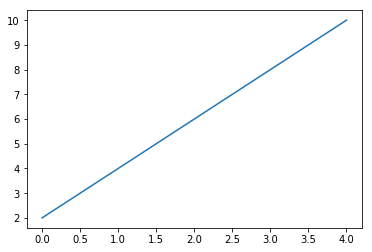

In [68]:
fig = plt.figure()
plot = plt.plot(x,y)

In [12]:
def pp():
    plt.plot(x, y)

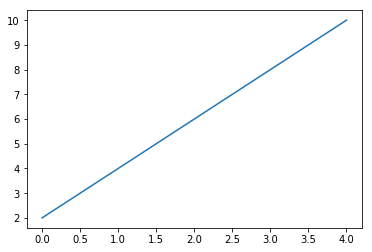

In [69]:
fig

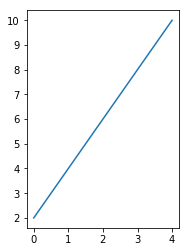

In [20]:
figu = plt.figure()
figu.add_subplot(121)
pp()

In [21]:
import h5py

In [22]:
s = h5py.File('ray.h5')

In [23]:
s.close()


In [24]:
s

<Closed HDF5 file>

In [25]:
from os import system

In [34]:
print(system("touch x"))


0


In [37]:
! ls


plot_slice_ndpl_spectra.py	slice_and_ray.py   spec_raw.png
plot_slice_ndpl_spectra.pyc	slice_nope.png	   spect.h5
ray.h5				slice.png	   xSlice_nope.png
slice_and_ray_playground.ipynb	spec_raw_nope.png  xSlice.png


In [33]:
from os import remove

In [38]:
remove('x')

OSError: [Errno 2] No such file or directory: 'x'